In [1]:
from qiskit_textbook.widgets import dj_widget
dj_widget(size='small', case='balanced')

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x05\x00\x00\x00\xcc\x08\x06\x00\x00\x00z\x06\xb6…

In [2]:
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

from qiskit.visualization import plot_histogram

In [3]:
n = 3

In [4]:
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

In [5]:
balanced_oracle = QuantumCircuit(n+1)

In [6]:
b_str = "101"

In [7]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

In [8]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.barrier()

for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()
    

┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

In [20]:
balanced_oracle = QuantumCircuit(n+1)
b_str = '101'

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.barrier()

for qubit in range(n):
    balanced_oracle.cx(qubit, n)
    
balanced_oracle.barrier()

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.draw()

┌───┐ ░                      ░ ┌───┐
q_0: ┤ X ├─░───■──────────────────░─┤ X ├
     └───┘ ░   │                  ░ └───┘
q_1: ──────░───┼────■─────────────░──────
     ┌───┐ ░   │    │             ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■────────░─┤ X ├
     └───┘ ░   │    │    │        ░ └───┘
q_3: ──────░───┼────┼────┼────■───░──────
           ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░      
q_4: ──────░─┤ X ├┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘└───┘ ░

In [10]:
dj_circuit = QuantumCircuit(n+1, n)

for qubit in range(n):
    dj_circuit.h(qubit)
    
dj_circuit.x(n)
dj_circuit.h(n)

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i, i)

dj_circuit.draw()

┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ H ├─░─┤M├──────
     ├───┤├───┤ ░ └╥┘┌─┐   
q_1: ┤ H ├┤ H ├─░──╫─┤M├───
     ├───┤├───┤ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░──╫──╫──╫─
     └───┘└───┘ ░  ║  ║  ║ 
c: 3/══════════════╩══╩══╩═
                   0  1  2

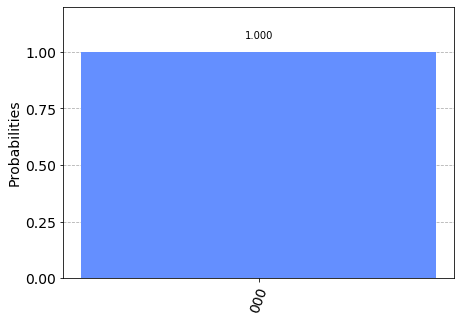

In [11]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [12]:
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    
    if case == "balanced":
        b = np.random.randint(1, 2**n)
        
        b_str = format(b, '0'+str(n)+'b')
        

In [13]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

In [14]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

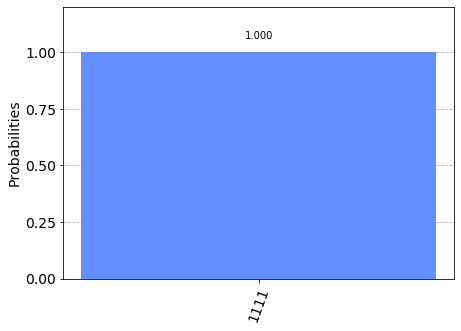

In [15]:
results = execute(dj_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [16]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

/home/sheff/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


least busy backend:  ibmq_valencia


In [17]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


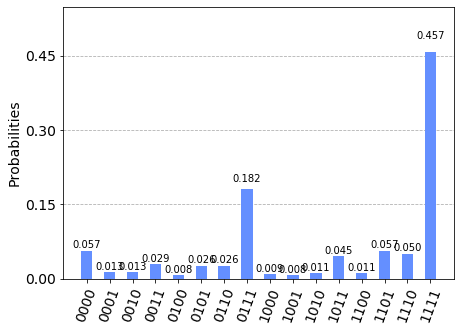

In [18]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)